In [109]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.pyplot import figure, show, close, xlabel, ylabel, title
from scipy.constants import k, h, c,e
from scipy.optimize import curve_fit
from spectrapepper import alsbaseline

In [110]:
def f_gaussian(x, amp, mu, sigma, zero):
    """returns the value of a Gaussian function with amplitude amp centered at position mu with width sigma and 
    offset with respect to the x-axis off zero"""
    # amp, mu, sigma, zero = p
    return amp * np.exp(-(x - mu) * (x - mu) / (2.0 * sigma * sigma)) + zero

def f_exp(x, a,b,z):
    """returns an exponential function of the form a*exp(b*x)"""
    return a*np.exp(b*x)+z

Filename: Reynier files/arcturus_wl.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (2004,)   float32   

data shape: (2004,)


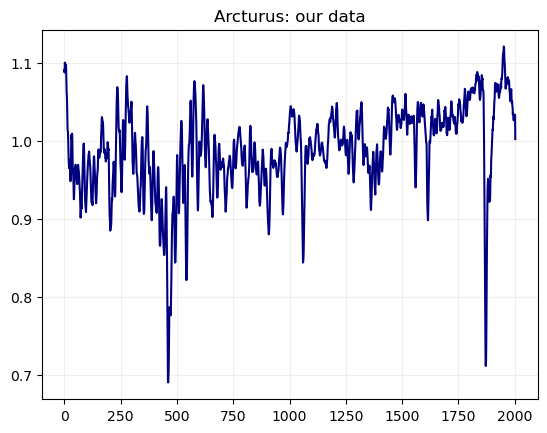

In [111]:
hdulist = fits.open('Reynier files/arcturus_wl.fits')
hdulist.info()
print()

hdr = hdulist[0].header
dat = hdulist[0].data
print(f"data shape: {dat.shape}")


fig=figure()
frame=fig.add_subplot(1,1,1)
frame.plot(dat,color="navy", label="Vega spectrum")
frame.set_title("Arcturus: our data")
frame.grid(alpha=0.2)
show()
close(fig)

hdulist.close()

[-1.59776819e-01  4.61396723e+02  3.77723421e+01  9.95669016e-01]


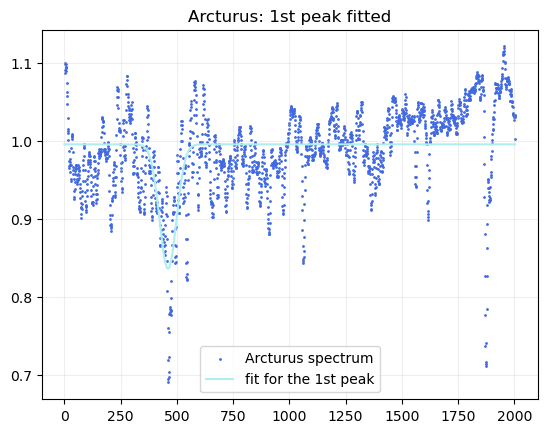

In [112]:
x_range = np.arange(1, dat.size+1)

# dat_smooth=alsbaseline(dat, remove=False)[200:]
dat_smooth=dat
# x_range=x_range[200:]

beta, pcov1 = curve_fit(f_gaussian, x_range, dat_smooth, p0=(-1, 450, 5, 1))
#amp, mu, sigma, zero

print(beta)

a1,m1,s1,z1=beta


fig=figure()
frame=fig.add_subplot(1,1,1)
frame.scatter(x_range,dat_smooth,color="royalblue", label="Arcturus spectrum",s=1)
frame.plot(f_gaussian(x_range,a1,m1,s1,z1),color="paleturquoise", label="fit for the 1st peak")
frame.set_title("Arcturus: 1st peak fitted")
frame.grid(alpha=0.2)
frame.legend()
show()
close(fig)

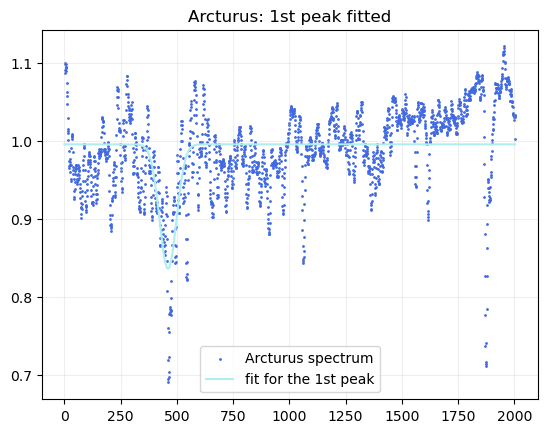

In [113]:

fig=figure()
frame=fig.add_subplot(1,1,1)
frame.scatter(x_range,dat_smooth,color="royalblue", label="Arcturus spectrum",s=1)
frame.plot(f_gaussian(x_range,a1,m1,s1,z1),color="paleturquoise", label="fit for the 1st peak")
frame.set_title("Arcturus: 1st peak fitted")
frame.grid(alpha=0.2)
frame.legend()
show()
close(fig)

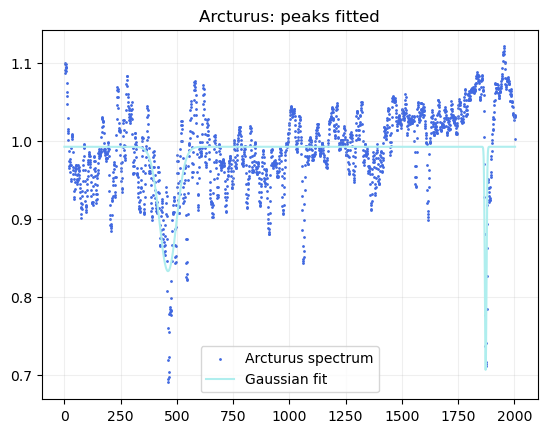

In [114]:
# questionably short

beta, pcov2 = curve_fit(f_gaussian, x_range, dat_smooth, p0=(-0.4, 1900, 50, 1.1))
a2,m2,s2,z2=beta
z = np.mean([z1,z2])

f_composed = f_gaussian(x_range,a1,m1,s1,z)+f_gaussian(x_range,a2,m2,s2,0)
fig=figure()
frame=fig.add_subplot(1,1,1)
frame.scatter(x_range,dat_smooth,color="royalblue", label="Arcturus spectrum",s=1)
frame.plot(f_composed,color="paleturquoise", label="Gaussian fit")
frame.set_title("Arcturus: peaks fitted")
frame.grid(alpha=0.2)
frame.legend()
show()
close(fig)

[0.00924643 0.00122183 0.94817456]


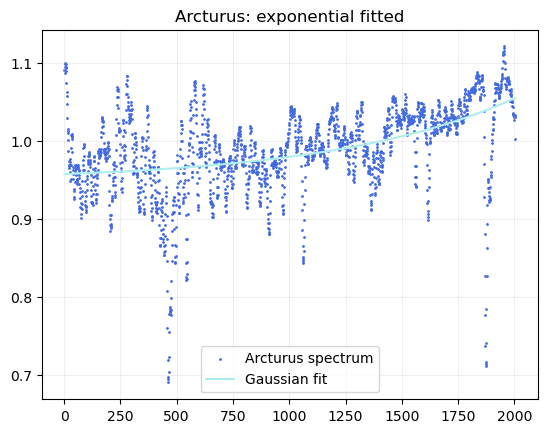

In [115]:
def f_superb(x,a1,m1,s1, a2,m2,s2, a,b,z):
    """Returns a combination of 2 Gaussians plotted on an exponential"""

    return a1 * np.exp(-(x - m1) * (x - m1) / (2.0 * s1 * s1)) + m2 * np.exp(-(x - a2) * (x - a2) / (2.0 * s2 * s2)) + a*np.exp(b*x)+z

beta, pcov_exp = curve_fit(f_exp,x_range,dat_smooth,p0=(1,0.0001,1))
print(beta)
exp_a,exp_b,exp_z = beta

fig=figure()
frame=fig.add_subplot(1,1,1)
frame.scatter(x_range,dat,color="royalblue", label="Arcturus spectrum",s=1)
frame.plot(x_range,f_exp(x_range,exp_a,exp_b,exp_z),color="paleturquoise", label="Gaussian fit")
frame.set_title("Arcturus: exponential fitted")
frame.grid(alpha=0.2)
frame.legend()
show()
close(fig)



[-1.65201273e-01  4.63418772e+02  2.31780506e+01  5.08056383e+00
  1.36314242e-01 -7.33149244e+00  6.32900356e-03  1.34323825e-03
  9.59620543e-01]


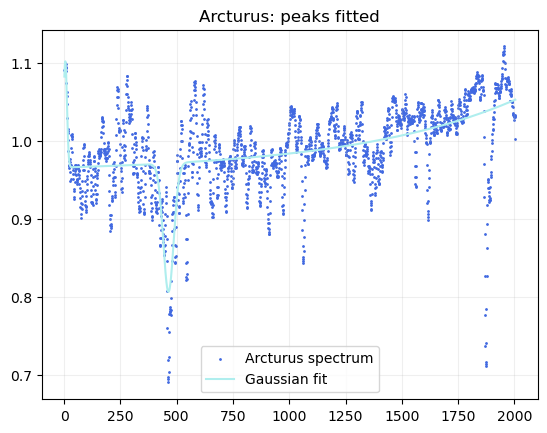

In [116]:
D1=np.array([a1,m1,s1])
D2=np.array([a2,m2,s2])
D_exp=np.array([exp_a,exp_b,1])

beta,pcov =curve_fit(f_superb, x_range, dat_smooth, p0=np.concatenate([D1, D2, D_exp]))
np.concatenate([D1, D2, D_exp])
a1,m1,s1,a2,m2,s2,a,b,z=beta
print(beta)

fig=figure()
frame=fig.add_subplot(1,1,1)
frame.scatter(x_range,dat_smooth,color="royalblue", label="Arcturus spectrum",s=1)
frame.plot(x_range,f_superb(x_range,a1,m1,s1,a2,m2,s2,a,b,z),color="paleturquoise", label="Gaussian fit")
frame.set_title("Arcturus: peaks fitted")
frame.grid(alpha=0.2)
frame.legend()
show()
close(fig)